<a href="https://colab.research.google.com/github/joaochenriques/HydroFit/blob/main/Fit_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import matplotlib.pyplot as mpl
import numpy as np
from scipy.optimize import curve_fit
from dataclasses import dataclass

import pathlib, subprocess, os
import pandas as pd

def cmdcall( cmd, verbose=True ):
    output = subprocess.getoutput( cmd )
    if verbose: print(output)

In [121]:
if not pathlib.Path("mpl_utils.py").exists():
    cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

from IPython.display import display, clear_output

In [122]:
def normalize( x ):
    m = np.max(x)
    return x / m, m

def characteristic_length( x ):
    return normalize( 1.0 / np.sqrt( x ) )[0]

def fit_func( x, ϕ0, α, p ):
    return ϕ0 + α * x**p

In [123]:
cmdcall( 'curl -O https://raw.githubusercontent.com/joaochenriques/HydroFit/main/DeltaWind.zip' )
cmdcall( 'unzip DeltaWind.zip' )

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4318  100  4318    0     0  15754      0 --:--:-- --:--:-- --:--:-- 15816
Archive:  DeltaWind.zip
replace DeltaWind HAMS_Ainf(3,3).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [124]:
@dataclass
class data_test:
    filename: str
    label: str
    solver: str
    i0: int

data_lst = [
    data_test( 'DeltaWind HAMS_Ainf(3,3).csv', '$A^\\infty_{33}$', 'HAMS', 4 ),
    data_test( 'DeltaWind WAMIT_Ainf(3,3).csv', '$A^\\infty_{33}$', 'WAMIT', 4 ),
#
    data_test( 'DeltaWind HAMS_B(3,3,1.00 rad_s).csv', '$B_{33}$', 'HAMS', 4 ),
    data_test( 'DeltaWind WAMIT_B(3,3,1.00 rad_s).csv', '$B_{33}$', 'WAMIT', 4 ),
#
    data_test( 'DeltaWind HAMS_C(3,3).csv', '$C_{33}$', 'HAMS', 4 ),
    data_test( 'DeltaWind WAMIT_C(3,3).csv', '$C_{33}$', 'WAMIT', 4 ),
]

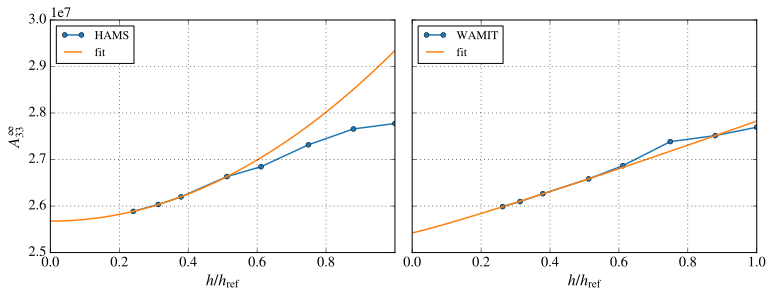

In [135]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4) )
fig.subplots_adjust( wspace = 0.05 )


data = data_lst[0]
df = pd.read_csv( data.filename, skiprows=[0,1], header=None, sep=';' )

h = characteristic_length( np.array( df[0] ) )
u, u_max = normalize( np.array( df[1] ) )

popt_H, _ = curve_fit(fit_func, h[data.i0:], u[data.i0:] )

h0 = np.linspace( 0.0, 1.0, 500 )
y0 = fit_func( h0, *popt_H )

ax1.plot( h, u*u_max, 'o-', label=data.solver )
ax1.plot( h0, y0*u_max, '-', label='fit' )
ax1.legend( loc='upper left', fontsize=12 )
ax1.set_ylim( (2.5E7, 3.0E7 ) )
ax1.set_xlabel( '$h/h_\mathrm{ref}$')
ax1.set_ylabel( data.label )
ax1.grid()
ax1.set_xticks( ax1.get_xticks()[0:-1] )

data = data_lst[1]
df = pd.read_csv( data.filename, skiprows=[0,1], header=None, sep=';' )

h = characteristic_length( np.array( df[0] ) )
u, u_max = normalize( np.array( df[1] ) )

popt, _ = curve_fit(fit_func, h[data.i0:], u[data.i0:] )

h0 = np.linspace( 0.0, 1.0, 500 )
y0 = fit_func( h0, *popt )

ax2.plot( h, u*u_max, 'o-', label=data.solver )
ax2.plot( h0, y0*u_max, '-', label='fit' )
ax2.legend( loc='upper left', fontsize=12 )
ax2.set_ylim( (2.5E7, 3.0E7 ) )
ax2.set_xlabel( '$h/h_\mathrm{ref}$' )
ax2.grid()
ax2.yaxis.set_ticklabels([]);

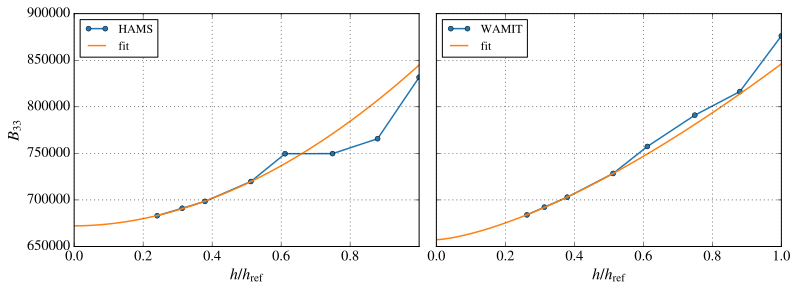

In [136]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4) )
fig.subplots_adjust( wspace = 0.05 )


data = data_lst[2]
df = pd.read_csv( data.filename, skiprows=[0,1], header=None, sep=';' )

h = characteristic_length( np.array( df[0] ) )
u, u_max = normalize( np.array( df[1] ) )

popt_H, _ = curve_fit(fit_func, h[data.i0:], u[data.i0:] )

h0 = np.linspace( 0.0, 1.0, 500 )
y0 = fit_func( h0, *popt_H )

ax1.plot( h, u*u_max, 'o-', label=data.solver )
ax1.plot( h0, y0*u_max, '-', label='fit' )
ax1.legend( loc='upper left', fontsize=12 )
ax1.set_ylim( (6.5E5, 9E5 ) )
ax1.set_xlabel( '$h/h_\mathrm{ref}$')
ax1.set_ylabel( data.label )
ax1.grid()
ax1.set_xticks( ax1.get_xticks()[0:-1] )

data = data_lst[3]
df = pd.read_csv( data.filename, skiprows=[0,1], header=None, sep=';' )

h = characteristic_length( np.array( df[0] ) )
u, u_max = normalize( np.array( df[1] ) )

popt, _ = curve_fit(fit_func, h[data.i0:], u[data.i0:] )

h0 = np.linspace( 0.0, 1.0, 500 )
y0 = fit_func( h0, *popt )

ax2.plot( h, u*u_max, 'o-', label=data.solver )
ax2.plot( h0, y0*u_max, '-', label='fit' )
ax2.legend( loc='upper left', fontsize=12 )
ax2.set_ylim( (6.5E5, 9E5 ) )
ax2.set_xlabel( '$h/h_\mathrm{ref}$' )
ax2.grid()
ax2.yaxis.set_ticklabels([]);

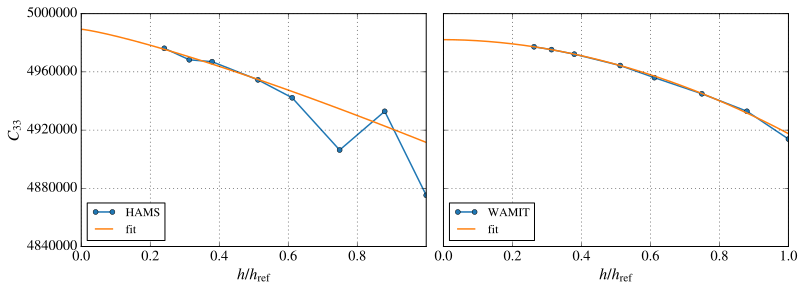

In [137]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4) )
fig.subplots_adjust( wspace = 0.05 )


data = data_lst[4]
df = pd.read_csv( data.filename, skiprows=[0,1], header=None, sep=';' )

h = characteristic_length( np.array( df[0] ) )
u, u_max = normalize( np.array( df[1] ) )

popt_H, _ = curve_fit(fit_func, h[data.i0:], u[data.i0:] )

h0 = np.linspace( 0.0, 1.0, 500 )
y0 = fit_func( h0, *popt_H )

ax1.plot( h, u*u_max, 'o-', label=data.solver )
ax1.plot( h0, y0*u_max, '-', label='fit' )
ax1.legend( loc='lower left', fontsize=12 )
ax1.set_ylim( (4.85E6, 5E6 ) )
ax1.yaxis.set_ticks( np.arange( 4.84E6, 5E6+1, 4E4 ) )
ax1.set_xlabel( '$h/h_\mathrm{ref}$')
ax1.set_ylabel( data.label )
ax1.grid()
ax1.set_xticks( ax1.get_xticks()[0:-1] )

data = data_lst[5]
df = pd.read_csv( data.filename, skiprows=[0,1], header=None, sep=';' )

h = characteristic_length( np.array( df[0] ) )
u, u_max = normalize( np.array( df[1] ) )

popt, _ = curve_fit(fit_func, h[data.i0:], u[data.i0:] )

h0 = np.linspace( 0.0, 1.0, 500 )
y0 = fit_func( h0, *popt )

ax2.plot( h, u*u_max, 'o-', label=data.solver )
ax2.plot( h0, y0*u_max, '-', label='fit' )
ax2.legend( loc='lower left', fontsize=12 )
ax2.yaxis.set_ticks( np.arange( 4.84E6, 5E6+1, 4E4 ) )
ax2.set_xlabel( '$h/h_\mathrm{ref}$' )
ax2.grid()
ax2.yaxis.set_ticklabels([]);